# Projet IA

## Installation de bibliothèques 

!pip install pandas 
!pip install numpy 
!pip install matplotlib
!pip install seaborn 
!pip install scikit-learn 
!pip install tensorflow
!pip install joblib 
!pip install openpyxl

## Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Chargement des données

In [2]:
# Chargement des données
df = pd.read_excel('dataset_02052023.xlsx')
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


## Observations du jeu de données 

In [3]:
# Information sur le jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [4]:
df.describe()

,Num,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Temperature_J5,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop
count,7409.000000,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000,7355.000000
mean,3705.000000,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,...,41.891094,0.001671,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241,0.037797
std,2138.938405,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,...,3.680003,0.148826,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340,0.190719
min,1.000000,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,...,32.000000,-0.656331,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000
25%,1853.000000,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,...,39.500000,-0.000483,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000
50%,3705.000000,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,...,44.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000
75%,5557.000000,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,...,44.500000,0.002115,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000,0.000000
max,7409.000000,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,...,44.937500,0.791929,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000


In [5]:
# 1. Pourcentage des NA par colonne
print("Pourcentage de NA par colonne :")
print(df.isnull().mean().sort_values(ascending=False) * 100)

# 2. Pourcentage global de NA
total_na = df.isnull().sum().sum()
total_cells = df.size
global_na_percentage = (total_na / total_cells) * 100
print(f"\nPourcentage global de valeurs manquantes : {global_na_percentage:.2f}%")

Pourcentage de NA par colonne :
Current_J5              0.728843
Temperature_J4          0.728843
Speed_J5                0.728843
Speed_J4                0.728843
Speed_J3                0.728843
Speed_J2                0.728843
Speed_J1                0.728843
Speed_J0                0.728843
Temperature_J5          0.728843
Robot_ProtectiveStop    0.728843
Current_J4              0.728843
Temperature_J3          0.728843
Current_J3              0.728843
Temperature_J2          0.728843
Current_J2              0.728843
Temperature_J1          0.728843
Current_J1              0.728843
Temperature_T0          0.728843
Tool_current            0.728843
Current_J0              0.620867
cycle                   0.000000
Num                     0.000000
Timestamp               0.000000
grip_lost               0.000000
dtype: float64

Pourcentage global de valeurs manquantes : 0.60%


## Pré-Traitement des données 
### Suppression des valeurs manquantes
Vu le faible pourcentage global de valeurs manquantes à 0.60%, nous nous sommes permis de supprimer les lignes comportant des valeurs manquantes.  

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Num                     0
Timestamp               0
Current_J0              0
Temperature_T0          0
Current_J1              0
Temperature_J1          0
Current_J2              0
Temperature_J2          0
Current_J3              0
Temperature_J3          0
Current_J4              0
Temperature_J4          0
Current_J5              0
Temperature_J5          0
Speed_J0                0
Speed_J1                0
Speed_J2                0
Speed_J3                0
Speed_J4                0
Speed_J5                0
Tool_current            0
cycle                   0
Robot_ProtectiveStop    0
grip_lost               0
dtype: int64

### Encodage des données

Pour la colonne 'Timestamp', les valeurs suivent la nomenclature suivante : "2022-10-26T15:35:44.438Z", du format ISO 8601, qui est une norme pour représenter les dates et heures. Pour transformer sous objet datetime, nous utiliserons la fonction parser de la librairie dateutil qui permet de convertir automatiquement des chaînes de caractères en objets datetime, sans avoir besoin de préciser le format exact.

#### Colonne 'Timestamp'

In [7]:

from dateutil import parser

def custom_parser(date_str):
    try:
        return parser.parse(date_str)
    except:
        return pd.NaT

df['Timestamp'] = df['Timestamp'].apply(custom_parser)

On range les données selon l'ordre chronologique des valeurs de la colonne 'Timestamp' et réinitialiser l'index. 

In [8]:
# Tri des données par la colonne 'Timestamp' dans l'ordre chronologique
df = df.sort_values(by='Timestamp')

# Si vous voulez réinitialiser l'index après le tri (optionnel)
df = df.reset_index(drop=True)
df['Timestamp']

0      2022-10-26 08:17:21.847000+00:00
1      2022-10-26 08:17:22.852000+00:00
2      2022-10-26 08:17:23.857000+00:00
3      2022-10-26 08:17:24.863000+00:00
4      2022-10-26 08:17:25.877000+00:00
                     ...               
7350                                NaT
7351                                NaT
7352                                NaT
7353                                NaT
7354                                NaT
Name: Timestamp, Length: 7355, dtype: datetime64[ns, tzutc()]

#### Notation exponentielle des valeurs de colonnes 'Speed_J...'  
Certaines valeurs sont trop petites et semblent proches de zéro mais non nulles.

📌 Problème : Cela pourrait être du bruit numérique et peut poser des problèmes d'arrondi ou d'interprétation. 

In [9]:
df.head()

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26 08:17:21.847000+00:00,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0.0,False
1,2,2022-10-26 08:17:22.852000+00:00,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0.0,False
2,3,2022-10-26 08:17:23.857000+00:00,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0.0,False
3,4,2022-10-26 08:17:24.863000+00:00,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0.0,False
4,5,2022-10-26 08:17:25.877000+00:00,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0.0,False


### Equilibrage des données

In [10]:
# Distribution de la variable cible
print("\nDistribution de la variable cible 'Protective Stops':")
print(df['Robot_ProtectiveStop'].value_counts())
print(f"Proportion de 'Robot_ProtectiveStop' positifs: {df['Robot_ProtectiveStop'].mean():.4f}")


Distribution de la variable cible 'Protective Stops':
Robot_ProtectiveStop
0.0    7077
1.0     278
Name: count, dtype: int64
Proportion de 'Robot_ProtectiveStop' positifs: 0.0378


In [11]:
import collections 

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def smote(df):
    # Séparer X (features) et y (cible)
    date = df['Timestamp']
    X = df.drop(columns=['Robot_ProtectiveStop','Timestamp'])
    y = df['Robot_ProtectiveStop']
    smote = SMOTE(sampling_strategy=0.5, random_state=42) # Ajuster le ratio
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Appliquer SMOTE
    return X_resampled, y_resampled


X_resampled, y_resampled = smote(df)

# Vérifier la nouvelle distribution
print("Après SMOTE :", Counter(y_resampled))


Après SMOTE : Counter({0.0: 7077, 1.0: 3538})


In [13]:
data = pd.concat([df['Timestamp'], X_resampled, y_resampled], axis=1)

# Analyse statistique

## Corrélation et linéarité

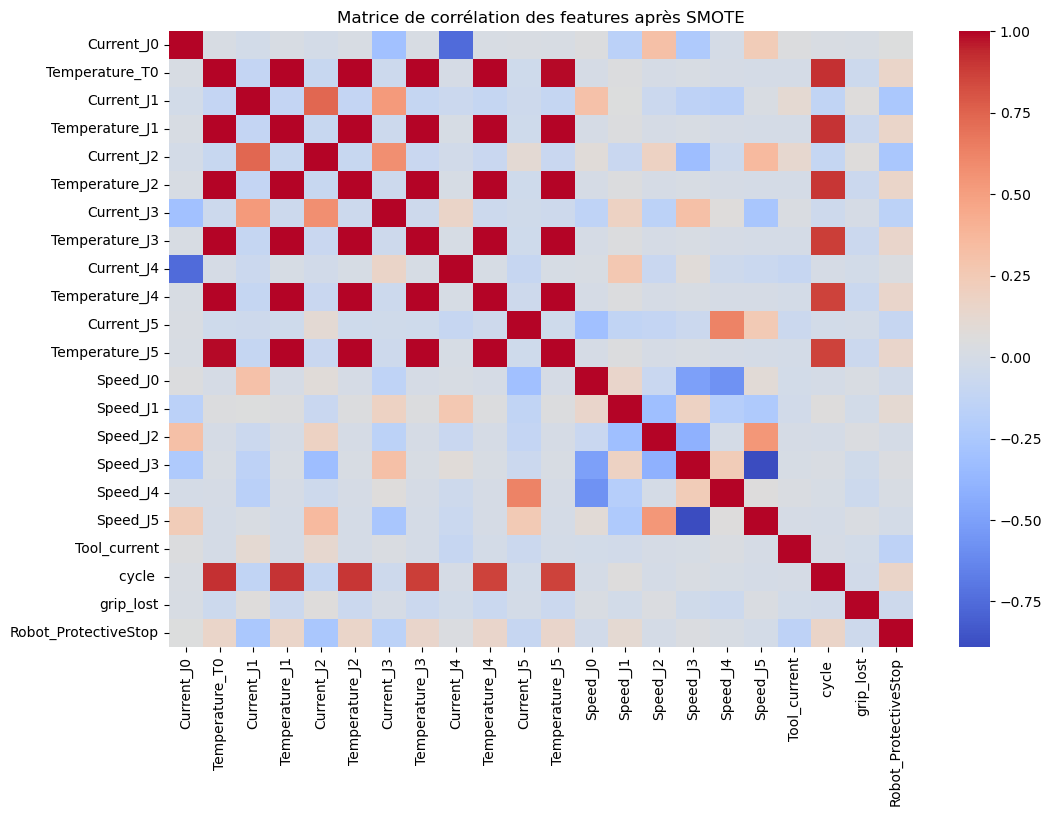

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
corr_cols = data.drop(columns=['Timestamp', 'Num'])
corr_matrix = pd.DataFrame(data, columns= corr_cols.columns).corr()

# Afficher un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des features après SMOTE")
plt.show()

D'après cette matrice de corrélation, plusieurs conclusions importantes pour votre projet de maintenance prédictive du cobot UR3 :

1. **Fortes corrélations entre températures** : Les températures des différentes articulations (Temperature_T0 à T5) sont fortement corrélées entre elles (zones rouges). Cela suggère qu'elles augmentent et diminuent généralement ensemble.

2. **Corrélations température-courant** : Il existe des corrélations significatives entre les températures et les courants des articulations. C'est logique car une augmentation du courant entraîne généralement une augmentation de température dans un système électromécanique.

3. **Groupes de variables** : On peut distinguer clairement trois groupes de variables :
   - Températures et courants (fortement corrélés entre eux)
   - Vitesses (Speed_J0 à J5) qui forment un groupe distinct
   - Tool_current, cycle et grip_lost qui ont des comportements plus indépendants

4. **Faible corrélation directe avec la variable cible** : La variable Robot_ProtectiveStop semble avoir des corrélations relativement faibles avec la plupart des variables individuelles (dernière ligne/colonne). Cela suggère que les arrêts de protection sont probablement causés par des interactions complexes entre variables ou par des patterns temporels plutôt que par des valeurs élevées d'une seule variable.

5. **Multicolinéarité importante** : Les fortes corrélations entre variables (zones rouges) indiquent une multicolinéarité qui pourrait poser problème pour certains modèles. Pour un LSTM, cela est moins problématique, mais pour d'autres modèles comme les régressions, il faudrait envisager:
   - Une réduction de dimensionnalité (PCA)
   - Une sélection de features
   - Des techniques de régularisation

6. **Relations entre vitesses** : Certaines vitesses d'articulations semblent négativement corrélées entre elles (zones bleues), ce qui indique que lorsqu'une articulation accélère, une autre ralentit, ce qui pourrait être lié à des mouvements spécifiques du robot.

7. **Variable cycle** : La variable cycle montre des corrélations modérées avec plusieurs variables de température, ce qui suggère qu'au fil des cycles d'utilisation, les températures évoluent d'une manière prévisible.

Implications pour la modélisation :

1. Vous pourriez réduire la dimensionnalité de vos données sans perdre beaucoup d'information (par exemple en ne gardant qu'une température d'articulation si elles sont toutes très corrélées).

2. Pour les modèles LSTM, l'évolution temporelle de ces corrélations sera probablement plus informative que les valeurs brutes à un instant donné.

3. La création de features combinées pourrait être utile (par exemple, des ratios courant/vitesse ou des différentiels de température entre articulations).

4. Étant donné que la variable cible n'a pas de corrélations fortes directes, un modèle temporel comme LSTM est en effet approprié pour capturer les séquences d'événements qui mènent à un arrêt de protection.

Cette matrice justifie votre approche de séquence temporelle de 10 pas, car les relations instantanées ne semblent pas suffisantes pour prédire les arrêts de protection.

In [15]:
# Suppression des features fortement corrélées
def remove_correlated_features(d, threshold=0.85):
    corr_matrix = df.corr().abs()
    to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                to_drop.add(colname)

    df_filtered = df.drop(columns=to_drop)
    print(f"✅ Features supprimées (corrélation > {threshold}): {len(to_drop)}")
    return df_filtered
data_without_y = data.drop(columns=['Robot_ProtectiveStop'])
x = remove_correlated_features(data_without_y, threshold=0.85)

✅ Features supprimées (corrélation > 0.85): 9


## Sélection par variance (Variance threshold)

In [16]:
import numpy as np
from sklearn.feature_selection import VarianceThreshold


# Sélection des features avec une variance significative
def reduction_variance(X, seuil=0.01):
    selector = VarianceThreshold(threshold=seuil)
    selected_features = selector.fit_transform(X)

    # Convertir en DataFrame avec les colonnes restantes
    selected_columns = X.columns[selector.get_support()]
    df_filtered = pd.DataFrame(selected_features, columns=selected_columns)

    print(f"✅ Features supprimées (variance < {seuil}): {X.shape[1] - df_filtered.shape[1]}")
    return df_filtered

data_without_y = data.drop(columns=['Robot_ProtectiveStop'])
# Appliquer le pipeline de sélection

x = reduction_variance(x, seuil=0.01)

print(f"📊 Nombre de features après filtrage final : {x.shape}")


✅ Features supprimées (variance < 0.01): 3
📊 Nombre de features après filtrage final : (7355, 12)


In [17]:
data = pd.concat([df['Timestamp'], x], axis=1)

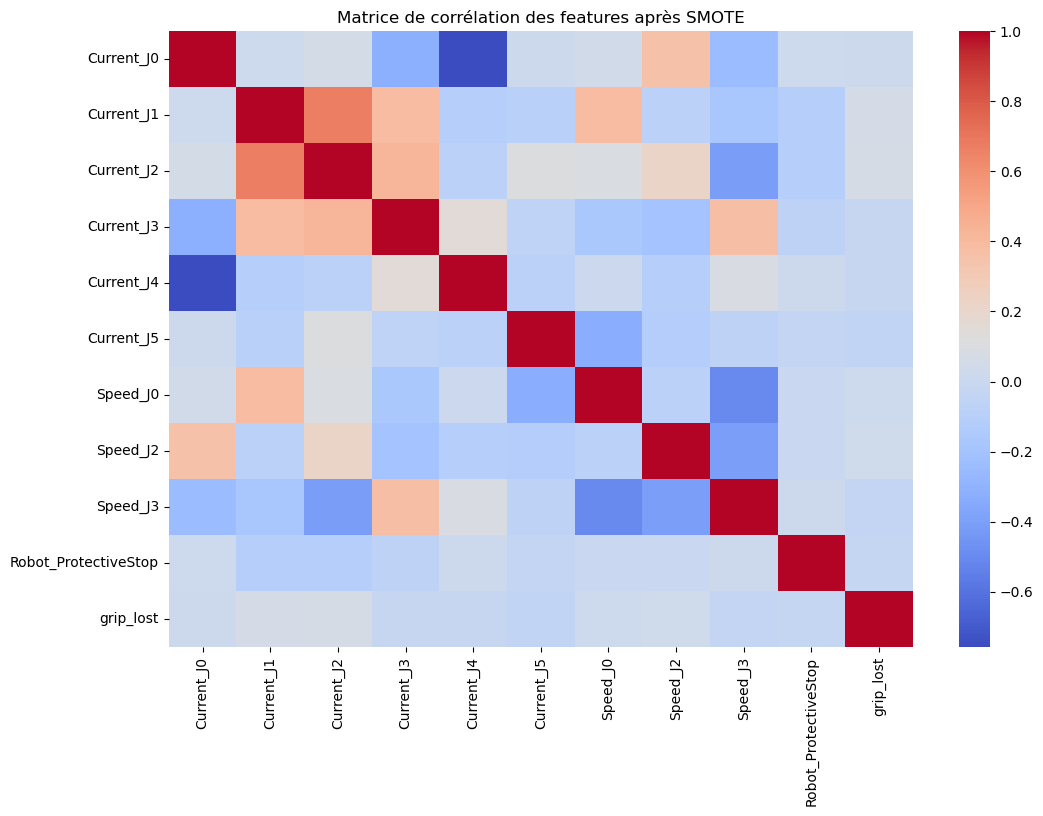

In [18]:
# Calculer la matrice de corrélation
corr_cols = data.drop(columns=['Timestamp', 'Num'])
corr_matrix = pd.DataFrame(data, columns= corr_cols.columns).corr()

# Afficher un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des features après SMOTE")
plt.show()

Les données que nous avons sont donc non corrélées et indépendantes après sélection par variance threshold. 

## Standardisation/ Normalisation
Pour effectuer le choix judicieux, nous avons visualiser les distributions des features. 

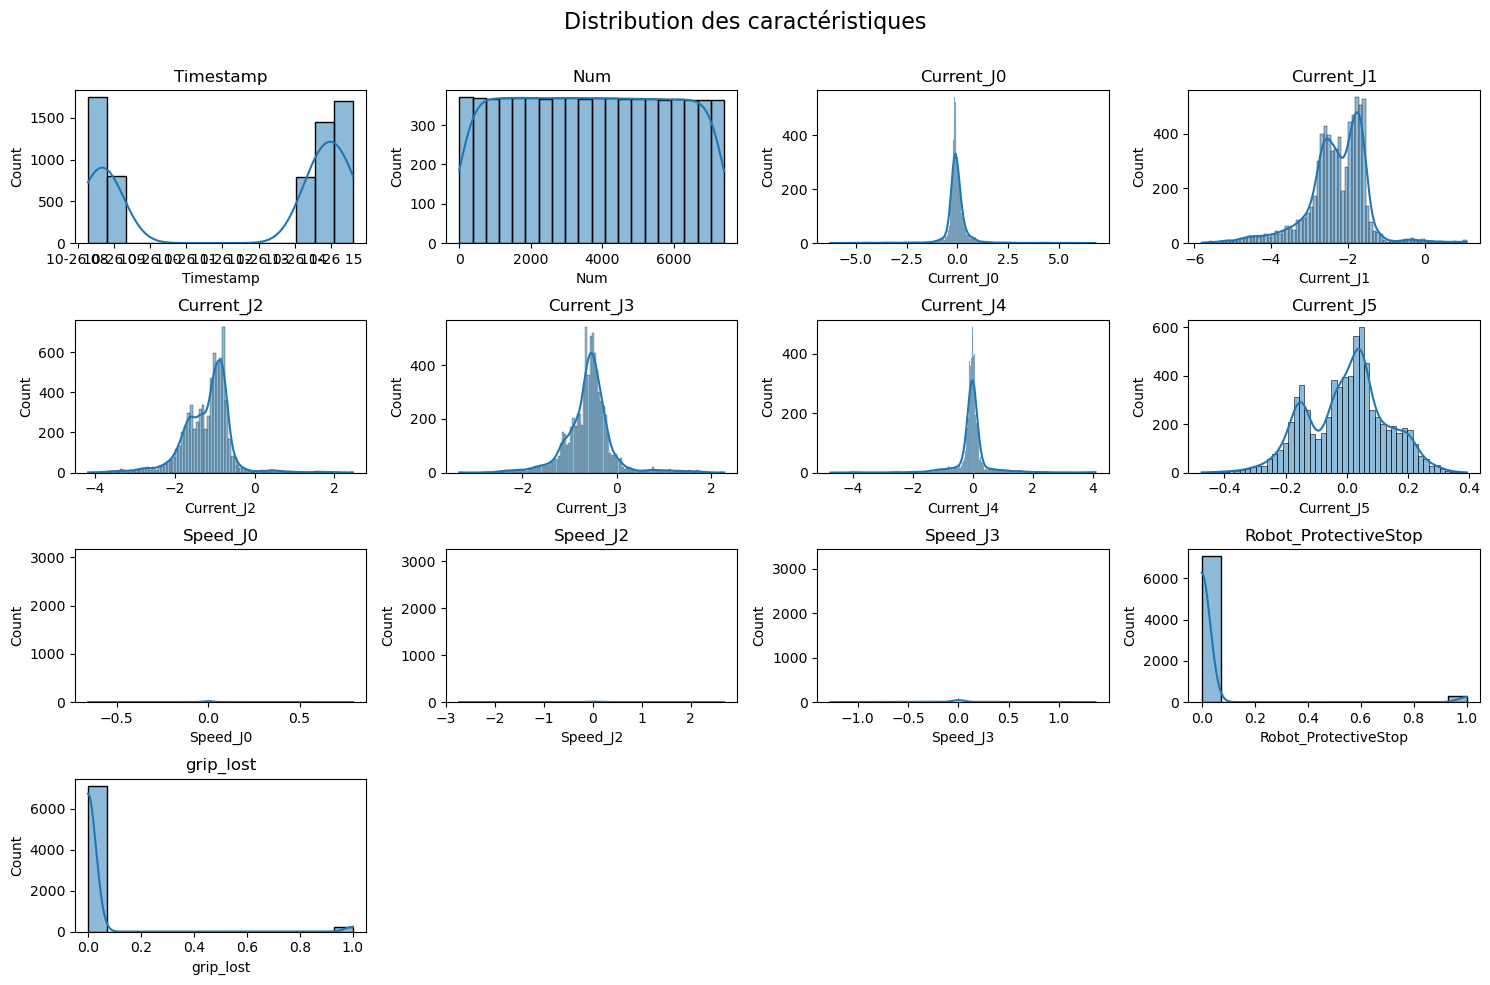

In [19]:
# Visualisation de la distribution des variables

def vizualise_distribution(df):
    plt.figure(figsize=(15, 10))
    plt.suptitle('Distribution des caractéristiques', fontsize=16)

    # Nombre de sous-graphiques
    n_cols = 4
    n_rows = (len(df.columns) - 1) // n_cols + 1

    for i, col in enumerate(df.columns):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(col)
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)

    
    plt.show()

vizualise_distribution(data)


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Assurons-nous que data contient toutes les colonnes nécessaires
print("Colonnes dans data:", data.columns.tolist())

Colonnes dans data: ['Timestamp', 'Num', 'Current_J0', 'Current_J1', 'Current_J2', 'Current_J3', 'Current_J4', 'Current_J5', 'Speed_J0', 'Speed_J2', 'Speed_J3', 'Robot_ProtectiveStop', 'grip_lost']


In [21]:
def create_sequences(data, target_col, sequence_length=10):
    """
    Crée des séquences de longueur sequence_length à partir des données 
    et associe chaque séquence à une valeur cible.
    """
    X, y = [], []
    for i in range(len(data) - sequence_length):
        # Séquence des caractéristiques (toutes les colonnes sauf la cible)
        seq = data.iloc[i:i+sequence_length].drop(columns=[target_col, 'Timestamp']).values
        # Valeur cible correspondante (valeur à l'instant t+sequence_length)
        target = data.iloc[i+sequence_length][target_col]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)


In [22]:
# Préciser la colonne cible correcte
target_col = 'Robot_ProtectiveStop'  # Utilisez le nom exact de votre colonne cible
features = data.columns.drop([target_col, 'Timestamp']).tolist()

# Normalisation des données - uniquement les features, pas la cible ni le timestamp
scaler = StandardScaler()
df_scaled = data.copy()
df_scaled[features] = scaler.fit_transform(data[features])

Definition des sequences temporelles pour les donnees du LSTM

In [23]:
# Création des séquences
print("\nCréation des séquences temporelles...")
X, y = create_sequences(df_scaled, target_col, sequence_length=10)
print(f"Forme de X (séquences): {X.shape}")
print(f"Forme de y (cibles): {y.shape}")


Création des séquences temporelles...


Forme de X (séquences): (7345, 10, 11)
Forme de y (cibles): (7345,)


In [24]:
# Division simple en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nEnsemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Ensemble de test: {X_test.shape[0]} échantillons")

# Sauvegarde des données prétraitées
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)


Ensemble d'entraînement: 5876 échantillons
Ensemble de test: 1469 échantillons


In [25]:
# Sauvegarde du scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')
print("\nPrétraitement terminé. Données prêtes pour l'entraînement du modèle.")


Prétraitement terminé. Données prêtes pour l'entraînement du modèle.


In [26]:
# Analyse de la distribution de la cible dans les ensembles d'entraînement, validation et test
print(f"\nDistribution de la cible dans l'ensemble d'entraînement: {np.mean(y_train):.4f}")
print(f"Distribution de la cible dans l'ensemble de test: {np.mean(y_test):.4f}")


Distribution de la cible dans l'ensemble d'entraînement: 0.0376
Distribution de la cible dans l'ensemble de test: 0.0388


## MODÈLE LSTM 


In [27]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-3.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.71.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached ml

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\USER\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this 

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
!pip install wandb
import wandb


  Using cached wandb-0.19.9-py3-none-win_amd64.whl.metadata (10 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached sentry_sdk-2.25.1-py2.py3-none-any.whl.metadata (10 kB)
Using cached wandb-0.19.9-py3-none-win_amd64.whl (20.2 MB)
Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------------- ----------------------- 0.8/2.0 MB 1.9 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/2.0 MB 1.9 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/2.0 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.9 MB/s eta 0:00:00
Using cached sentry_sdk-2.25.1-py2.py3-none-any.whl (339 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
pip install wandb --upgrade

Note: you may need to restart the kernel to use updated packages.


# 1. DÉFINITION DU MODÈLE


On va parametrer les differentes couches de notre modele LSTM


In [30]:
seq_length=10
nombre_feature = 11
dropout_rate = 0.2 #dropout_rate (float): Taux de dropout pour éviter le surapprentissage
lstm_units =50 #Nombre d'unités dans les couches LSTM

# Architecture du modèle LSTM
def create_lstm_model(lstm_units=50, dropout_rate=0.2):
    model = Sequential()
    
    # Première couche LSTM avec return_sequences=True pour empiler une autre couche LSTM
    model.add(LSTM(units=lstm_units, 
                  return_sequences=True, 
                  input_shape=(seq_length, nombre_feature),
                  name='lstm_layer_1'))
    model.add(Dropout(dropout_rate))
    
    # Deuxième couche LSTM
    model.add(LSTM(units=lstm_units, name='lstm_layer_2'))
    model.add(Dropout(dropout_rate))
    
    # Vérifier si c'est un problème binaire ou multiclasse
    num_classes = len(np.unique(y_train))
    if num_classes == 2:
        model.add(Dense(units=1, activation='sigmoid'))
        loss_function = 'binary_crossentropy'
    else:
        model.add(Dense(units=num_classes, activation='softmax'))
        loss_function = 'sparse_categorical_crossentropy'
    
    # Compilation du modèle
    model.compile(
        optimizer='adam',  # Optimiseur Adam (peut être ajusté)
        loss='binary_crossentropy',  # Fonction de perte pour classification binaire
        metrics=['accuracy']  # Métrique principale
    )
    
    return model

# Création du modèle
model = create_lstm_model(lstm_units=lstm_units, dropout_rate=dropout_rate)

# Affichage du résumé du modèle pour vérification
model.summary()



c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_layer_1 (LSTM)             │ (None, 10, 50)         │        12,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer_2 (LSTM)             │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,651 (127.54 KB)

 Trainable params: 32,651 (127.54 KB)

 Non-trainable params: 0 (0.00 B)

# 2. ENTRAÎNEMENT DU MODÈLE

Le CPU n'etant pas forcement disponible, il est plus prudent d'ajouter l'option GPU pour un entrainement rapide du modele

In [31]:
# Configuration de Weights & Biases pour le suivi des expériences

import wandb
from wandb.integration.keras import WandbMetricsLogger
wandb.login()
wandb.init(project="UR3-Cobot-Protective-Stops", name="LSTM-Base-Model", reinit=True)

# Configuration du run WandB
config = {
    "model_type": "LSTM",
    "lstm_layers": 2,
    "lstm_units": lstm_units,
    "dropout_rate": dropout_rate,
    "optimizer": "adam",
    "batch_size": 32,
    "epochs": 10,
    "sequence_length": seq_length,
    "features": nombre_feature
}
wandb.config.update(config)

# Entraînement du modèle (avec GPU si disponible)
try:
    # Tentative d'utilisation du GPU
    with tf.device('/GPU:0'):
        history = model.fit(
            X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_data=(X_test, y_test),
            callbacks=[WandbMetricsLogger()]
        )
        print("Entraînement effectué sur GPU")
except:
    # Fallback sur CPU si le GPU n'est pas disponible
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[WandbMetricsLogger()]
    )
    print("Entraînement effectué sur CPU")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: lethyciachaho (lethyciachaho-ecolec-entrale) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 28:12 9s/step - accuracy: 0.4375 - loss: 0.69 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5443 - loss: 0.6865 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6063 - loss: 0.679 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6409 - loss: 0.673 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6699 - loss: 0.667 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6941 - loss: 0.660 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7234 - loss: 0.650 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7462 - loss: 0.638 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7649 - loss: 0.626 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7803 - loss: 0.613 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7932 - loss: 0.599 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8042 - loss: 0.584 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8137 - loss: 0.571 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8220 - loss: 0.557 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accura

# 3. ÉVALUATION DU MODÈLE

In [32]:
# Évaluer le modèle

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 1.0000 - loss: 0.028 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9759 - loss: 0.068 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9663 - loss: 0.081 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9623 - loss: 0.086 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9617 - loss: 0.08 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9616 - loss: 0.08 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9615 - loss: 0.09 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9615 - loss: 0.091 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9616 - loss: 0.091 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9617 - loss: 0.0918
Test Loss: 0.09253785759210587
Test Accuracy: 0.9632403254508972


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

# Prédictions sur l'ensemble de test
y_pred_prob = model.predict(X_test)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")

# Rapport de classification détaillé
report = classification_report(y_test, y_pred_classes)
print("\nRapport de classification:")
print(report)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.tight_layout()

# Sauvegarder l'image de la matrice de confusion
plt.savefig("conf_matrix.png")
plt.close()

# Enregistrement des métriques dans WandB
wandb.log({
    "test_loss": loss,
    "test_accuracy": accuracy,
    "classification_report_text": report,  # En texte brut
    "confusion_matrix": wandb.Image("conf_matrix.png")  # Image enregistrée
})


46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 560ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/ste ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Rapport de classification:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1412
         1.0       0.56      0.25      0.34        57

    accuracy                           0.96      1469
   macro avg       0.77      0.62      0.66      1469
weighted avg       0.95      0.96      0.96      1469



In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prédictions du modèle
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Affichage
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 25s 559ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/ste ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
Accuracy:  0.9626
Precision: 0.5294
Recall:    0.3158
F1-score:  0.3956


# 4.Validation croisee

L'approche d'optimisation des hyperparamètres crée plusieurs modèles temporaires pour tester différentes configurations, puis à la fin, crée un modèle final avec les meilleurs paramètres. C'est un processus standard pour trouver la meilleure configuration avant d'implémenter l'API Flask.

In [34]:
from sklearn.model_selection import KFold, ParameterGrid
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb

# Définition des hyperparamètres à tester
param_grid = {
    'lstm_units': [32, 50, 64],
    'dropout_rate': [0.2],
    'batch_size': [32, 50],
    'learning_rate': [0.01]
}

# Fonction pour créer le modèle avec un taux d'apprentissage personnalisable
def create_lstm_model(lstm_units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    
    model.add(LSTM(units=lstm_units, 
                  return_sequences=True, 
                  input_shape=(seq_length, nombre_feature),
                  name='lstm_layer_1'))
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(units=lstm_units, name='lstm_layer_2'))
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(units=1, activation='sigmoid'))
    
    # Utiliser Adam avec le taux d'apprentissage spécifié
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Configuration pour la validation croisée
n_folds = 3
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Dictionnaire pour stocker les résultats
results = []

# Parcourir toutes les combinaisons d'hyperparamètres
for params in ParameterGrid(param_grid):
    print(f"\nTesting parameters: {params}")
    fold_accuracies = []
    fold_losses = []
    
    # Validation croisée
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        print(f"Fold {fold+1}/{n_folds}")
        
        # Préparation des données pour ce fold
        X_fold_train, X_fold_val = X_train[train_idx], X_train[val_idx]
        y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
        
        # Création et entraînement du modèle
        model = create_lstm_model(
            lstm_units=params['lstm_units'],
            dropout_rate=params['dropout_rate'],
            learning_rate=params['learning_rate']
        )
        
        # Early stopping pour éviter le surapprentissage
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
        
        history = model.fit(
            X_fold_train, y_fold_train,
            epochs=10,  # Plus d'époques car on a early stopping
            batch_size=params['batch_size'],
            validation_data=(X_fold_val, y_fold_val),
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Evaluation sur les données de validation
        val_loss, val_accuracy = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        fold_losses.append(val_loss)
        fold_accuracies.append(val_accuracy)
    
    # Calcul des moyennes pour ce jeu de paramètres
    mean_accuracy = np.mean(fold_accuracies)
    mean_loss = np.mean(fold_losses)
    
    # Enregistrement des résultats
    results.append({
        **params,
        'mean_val_accuracy': mean_accuracy,
        'mean_val_loss': mean_loss,
        'std_val_accuracy': np.std(fold_accuracies)
    })
    
    print(f"Mean validation accuracy: {mean_accuracy:.4f}")
    print(f"Mean validation loss: {mean_loss:.4f}")

# Convertir les résultats en DataFrame pour faciliter l'analyse
results_df = pd.DataFrame(results)
print("\nRésultats d'optimisation des hyperparamètres:")
print(results_df.sort_values('mean_val_accuracy', ascending=False))

# Trouver les meilleurs hyperparamètres
best_params = results_df.loc[results_df['mean_val_accuracy'].idxmax()]
print(f"\nMeilleurs hyperparamètres: {dict(best_params)}")

# Entraîner le modèle final avec les meilleurs hyperparamètres
final_model = create_lstm_model(
    lstm_units=int(best_params['lstm_units']),
    dropout_rate=best_params['dropout_rate'],
    learning_rate=best_params['learning_rate']
)

# Configuration de WandB pour le modèle final
wandb.init(project="UR3-Cobot-Protective-Stops", name="LSTM-Optimized-Model", reinit=True)
wandb.config.update({
    "model_type": "LSTM-Optimized",
    "lstm_layers": 2,
    "lstm_units": int(best_params['lstm_units']),
    "dropout_rate": best_params['dropout_rate'],
    "learning_rate": best_params['learning_rate'],
    "optimizer": "adam",
    "batch_size": int(best_params['batch_size']),
    "sequence_length": seq_length,
    "features": nombre_feature
})


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'learning_rate': 0.01, 'lstm_units': 32}
Fold 1/3


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 11:04 5s/step - accuracy: 0.5938 - loss: 0.69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7761 - loss: 0.5476 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8354 - loss: 0.449 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8588 - loss: 0.406 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8741 - loss: 0.376 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8850 - loss: 0.353 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8937 - loss: 0.334 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8991 - loss: 0.322 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9035 - loss: 0.312 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9073 - loss: 0.303 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9107 - loss: 0.295 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9138 - loss: 0.288 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9166 - loss: 0.281 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9189 - loss: 0.276 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accura

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


epoch/accuracy,▁▅▅▅▆▆▆▇▇█
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▅▄▄▃▃▂▂▁▁
epoch/val_accuracy,▄▄▂▂▁▅▇▅██
epoch/val_loss,█▆▄▃▂▂▂▂▁▁
test_accuracy,▁
test_loss,▁
classification_report_text,precis...
epoch/accuracy,0.96818
epoch/epoch,9


In [35]:
# Entraînement du modèle final
history = final_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=int(best_params['batch_size']),
    validation_data=(X_test, y_test),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        WandbMetricsLogger()
    ]
)

# Évaluation sur les données de test
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print(f"Test accuracy with optimized parameters: {test_accuracy:.4f}")
print(f"Test loss with optimized parameters: {test_loss:.4f}")

Epoch 1/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 26:38 9s/step - accuracy: 0.6250 - loss: 0.68 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.6172 - loss: 0.66 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6870 - loss: 0.5539 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7405 - loss: 0.483 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.7778 - loss: 0.429 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7960 - loss: 0.401 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8178 - loss: 0.366 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8239 - loss: 0.357 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8336 - loss: 0.344 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8420 - loss: 0.333 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8493 - loss: 0.323 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8585 - loss: 0.311 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8658 - loss: 0.302 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8699 - loss: 0.296 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accura

In [41]:
from sklearn.metrics import classification_report

# Prédictions sur X_test
y_pred_proba = final_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32").ravel()

# Rapport de classification détaillé
report = classification_report(y_test, y_pred, output_dict=True)

# Affichage clair des métriques pour la classe 1 (arrêt de protection)
print(f"\nTest accuracy with optimized parameters: {report['accuracy']:.4f}")
print(f"Precision (classe 1): {report['1.0']['precision']:.4f}")
print(f"Recall (classe 1):    {report['1.0']['recall']:.4f}")
print(f"F1-score (classe 1):  {report['1.0']['f1-score']:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 17s 396ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/ste ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Test accuracy with optimized parameters: 0.9694
Precision (classe 1): 0.7500
Recall (classe 1):    0.3158
F1-score (classe 1):  0.4444


In [39]:
# Visualisation des résultats de l'optimisation
plt.figure(figsize=(12, 8))
params_to_plot = ['lstm_units', 'dropout_rate', 'batch_size', 'learning_rate']
n_params = len(params_to_plot)

for i, param in enumerate(params_to_plot):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=param, y='mean_val_accuracy', data=results_df)
    plt.title(f'Impact of {param} on Validation Accuracy')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("hyperparameter_optimization.png")
plt.close()



## Analyse 
✅ Accuracy a légèrement augmenté.

✅ Precision (classe 1) a nettement augmenté : le modèle fait moins de faux positifs (quand il dit "il y a un arrêt", il a plus souvent raison).

⚠️ Recall (classe 1) n’a pas bougé : Le modèle détecte toujours aussi peu de vrais arrêts. Il reste très prudent.

✅ F1-score a légèrement progressé : donc un meilleur équilibre qu’avant entre recall et precision, mais recall reste le point faible

# 4. SAUVEGARDE DU MODÈLE

In [37]:
# Enregistrer les métriques et visualisations dans WandB
wandb.log({
    "final_test_loss": test_loss,
    "final_test_accuracy": test_accuracy,
    "hyperparameter_optimization": wandb.Image("hyperparameter_optimization.png")
})

# Sauvegarder le modèle final
final_model.save('lstm_optimized_model.h5')
print("Modèle optimisé sauvegardé avec succès!")


# Sauvegarde du modèle pour WandB
#model_filename = "LSTM_model.pkl"
#joblib.dump(model, model_filename)

# Enregistrement du modèle dans WandB
artifact = wandb.Artifact("lstm_optimized_model.h5", type="model")
artifact.add_file("lstm_optimized_model.h5")
wandb.log_artifact(artifact)

Modèle optimisé sauvegardé avec succès!


<Artifact lstm_optimized_model.h5>

# 5. TEST SUR UN ÉCHANTILLON

In [38]:
from tensorflow.keras.models import load_model
#Chargement du modèle (pour simuler une utilisation après entraînement)
loaded_model = load_model('lstm_optimized_model.h5')

# Préparation d'un échantillon pour test
sample_sequence = X[1]  # Prendre un exemple du jeu de données
sample_sequence = sample_sequence.reshape((1, seq_length, nombre_feature))

# Prédiction
prediction_prob = loaded_model.predict(sample_sequence)
predicted_class = np.argmax(prediction_prob)

# Interprétation de la prédiction
class_names = {
    0: "Fonctionnement normal",
    1: "Arrêt de protection imminent",
}  # Classification binaire

print(f"\nPrédiction pour l'échantillon test:")
print(f"Classe prédite: {predicted_class} - {class_names.get(predicted_class)}")
print(f"Probabilités: {prediction_prob[0]}")

# Terminer la session WandB
wandb.finish()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/ste ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Prédiction pour l'échantillon test:
Classe prédite: 0 - Fonctionnement normal
Probabilités: [0.00021043]


epoch/accuracy,▁▂▂▃▄▅▅▆▇█
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▅▄▃▃▂▂▁▁
epoch/val_accuracy,▂▂▂▁▄▁█▄▆▆
epoch/val_loss,█▆▄▂▁▂▁▂▃▅
final_test_accuracy,▁
final_test_loss,▁
epoch/accuracy,0.98281
epoch/epoch,9
epoch/learning_rate,0.01
